# Домашнє завдання № 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
df.shape

(545, 13)

#### 1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді

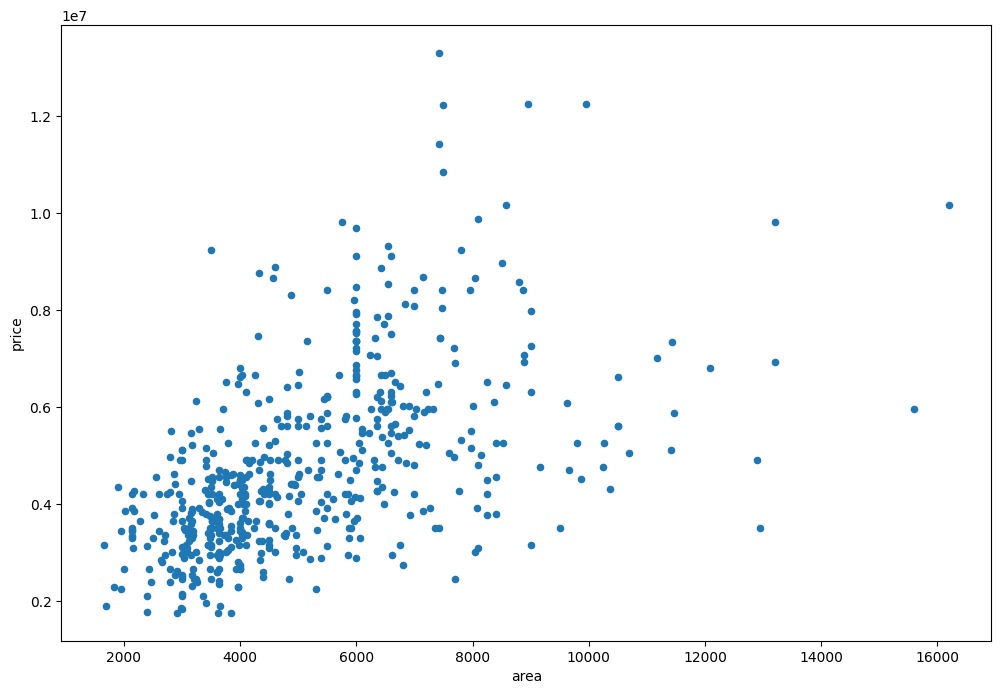

In [5]:
# Побудуємо залежність ціни від площі будинку.
df.plot(x='area', y='price', kind='scatter', figsize=(12, 8))
plt.show()

In [6]:
# Визначимо кореляцію площі та ціни.
df_corr = df[['area', 'price']].corr()
df_corr

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


##### Формула лінійної регресії:
$$h(x) = w_0 + w_1*x$$
##### де x - вхідна змінна; w_0, w_1 - коефіцієнти (ваги)

In [7]:
# Функція лінійної регресії.
def h(w_0, w_1, x):
    return w_0 + w_1*x

#### 2. Створіть функцію для обчислення функції втрат у векторному вигляді

In [8]:
def loss_function(w_0, w_1, df):

    n = df.area.shape[0]  # 545
    cost = 0  # сума
    for x, y in zip(df.area, df.price):  # створення пар значень для x, y
        cost = cost + (h(w_0, w_1, x) - y)**2  # "h() - y" - різниця між розрахунковим та реальним результатом
    return cost/(2*n)

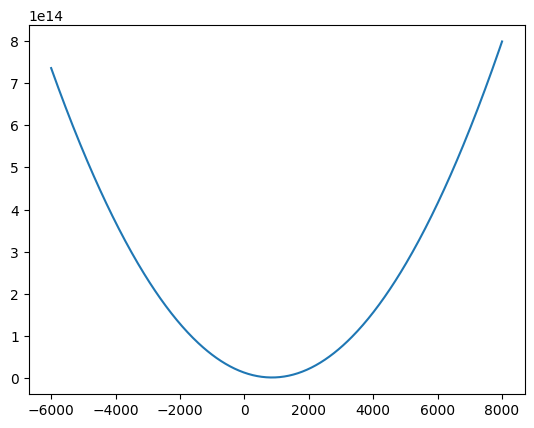

In [9]:
# Відмалюємо функцію втрат (помилок) на площині для заданих ваг.
w_0 = 0
w_1 = np.linspace(-6000, 8000, 500)  # створення рівномірного списку з 500 значень від -6000 до 8000
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])
plt.show()

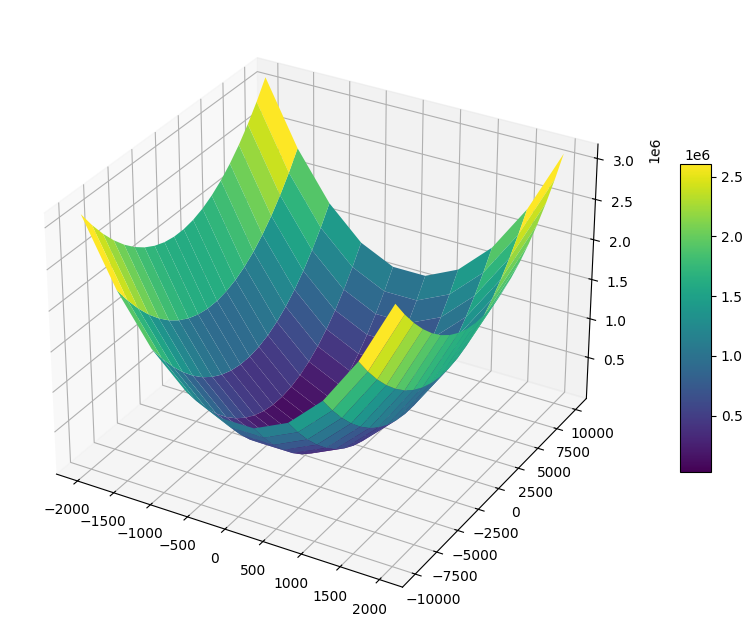

In [14]:
# Відмалюємо цю функцію втрат у тривімирному вигляді.
# * До запуску цього рядка спочатку запустити рядок з norm['price'] і norm['area']
from mpl_toolkits.mplot3d import Axes3D
w_0 = np.linspace(-2000, 2000, 10)  # список значень від -2000 до 2000 (не включно) з кроком 10
w_1 = np.linspace(-10000, 10000, 20)
W0, W1 = np.meshgrid(w_0, w_1)  # створення координатних сіток на основі введених масивів
Z = loss_function(W0, W1, norm)
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(W0, W1, Z, cmap='viridis')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
plt.show()

#### 3. Реалізуйте один крок градієнтного спуску

In [ ]:
# Створимо ф-ю, яка буде виконувати один крок градієнтного спуску.
def grad_step(weights, grads, learning_rate=0.001):  # grads - градієнти, learning_rate - коеф. навчання
    
    w_0, w_1 = weights
    grad_0, grad_1 = grads
    w_0 = w_0 - learning_rate * grad_0
    w_1 = w_1 - learning_rate * grad_1
    return w_0, w_1

In [ ]:
# Створимо ф-ї, які рахуватимуть похідні.
def grad_w_0(w_0, w_1, df):

    n = df.area.shape[0]  # 545
    cost = 0  # сума
    for x, y in zip(df.area, df.price):  # створення пар значень для x, y
        cost = cost + (h(w_0, w_1, x) - y)  # "h() - y" - різниця між розрахунковим та реальним результатом
    return cost/n


def grad_w_1(w_0, w_1, df):

    n = df.area.shape[0]  # 545
    cost = 0 
    for x, y in zip(df.area, df.price):  # створення пар значень для x, y
        cost = cost + (h(w_0, w_1, x) - y)*x  # "h() - y" - різниця між розрахунковим та реальним результатом
    return cost/n

In [ ]:
# Створимо ф-ю, яка буде робити всі кроки градієнтного спуску.
def grad_descent(weights, df, num_iter, learning_rate=0.001, epsilon=0.0000000001):

    # epsilon - значення, при якому спуск зупиняється
    
    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]
    
    for i in range(num_iter):
        
        # розрахуємо градієнти
        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        grads = (d_w_0, d_w_1)
        
        w_0, w_1 = grad_step(weights, grads, learning_rate=learning_rate)  # робимо крок спуску
        weights = (w_0, w_1)
        loss = loss_function(w_0, w_1, df)
        
        if abs(loss-loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        
        loss_history.append(loss)

    return weights, loss_history
    

In [12]:
# Напишемо функцію для нормалізації даних.
def normalization(data):

    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean)/value_range
        result.append(norm_x)

    return result

In [34]:
# створимо новий порожній DF, в якому пронормуємо стовпчик ціни та площі
# цей нормований DF підставимо вище у функцію втрат замість df, тоді замість зігнутої поверхні отримаємо "сідло"
norm = pd.DataFrame()
norm['price'] = normalization(df.price)
norm['area'] = normalization(df.area)

norm.head(500)

,price,area
0,0.738811,0.155977
1,0.647902,0.261818
2,0.647902,0.330547
3,0.644872,0.161475
4,0.575175,0.155977
...,...,...
495,-0.176340,-0.079075
496,-0.179370,-0.079075
497,-0.182401,-0.083611
498,-0.182401,-0.216532


In [ ]:
# Тренування моделі (після нормалізації ціни та площі).
weights, history = grad_descent((0., 0.), norm, 1000, learning_rate=0.1)

In [ ]:
history  # кількість значень показує кількість спусків, якщо спусків мало, треба зменшувати epsilon

In [ ]:
len(history)

In [ ]:
# Як видно з графіка, крива (поки вона пряма лінія) спадає і можна натренувати модель ще якісніше за рахунок збільшення кроку навчання.
# Для цього в тренування вище додамо параметр learning_rate=0.1

In [ ]:
# Проведемо донавчання.
weights, history_ext = grad_descent(weights, norm, 1000, learning_rate=0.1)

In [ ]:
# отримано наступні ваги
weights

In [ ]:
# Візуалізуємо результати тренування моделі.
# залежність ціни від площі
plt.figure(figsize=(14, 8))
plt.plot(norm.area, norm.price, 'rx')
# лінія, яку отримано під час навчання
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h(weights[0], weights[1], x))
plt.grid()

In [ ]:
# Побудуємо криву навчання для розуміння якості тренування. 
# При цьому використаємо список history та history_ext (після донавчання)
plt.figure(figsize=(14, 8))
history = history + history_ext
plt.plot(history)
plt.grid()

In [ ]:
# Тепер крива плавно спадає і ми бачимо, що лінія стає майже горизонтальною, тобто навчання більше не відбувається

#### 4. Знайдіть найкращі параметри $\vec{w}$ для датасету: прогнозну ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [56]:
# Створимо двовимірний масив даних з нормалізованою 'area', а також 'bedrooms' & 'bathrooms'
X = np.column_stack([norm.area, df.bedrooms, df.bathrooms])
X.shape

(545, 3)

In [57]:
# Створимо одновимірний масив даних з нормалізованою 'price'
y = np.array(norm.price)
y.shape

(545,)

In [58]:
model.fit(X, y)

LinearRegression()

In [59]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [60]:
# Розіб'ємо дані на навчальну (70%) та тестову (30%) вибірки.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(381, 3) (381,)
(164, 3) (164,)


In [64]:
# Навчання та оцінювання якості навчання.
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(X_train, y_train)  # навчання

LinearRegression()

In [72]:
# Оцінимо якість навчання моделі через корінь середньоквадратичної помилки тестових і прогнозних значень
from sklearn import metrics
y_predict = model.predict(X_test)  # прогнозні значення ціни
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_predict))  # чим менше RMSE, тим краще
print('Root Mean Squared Error (RMSE):', RMSE)

Root Mean Squared Error (RMSE): 0.1335650125913578


In [73]:
# Виведемо отримані параметри $\vec{w}$ датасету
coefficients = model.coef_
print(coefficients)

[0.46793125 0.0324067  0.12142623]


#### 5. Знайдіть ці ж параметри за допомогою аналітичного рішення